In [1]:
# Code to generate data. 
from util.supervised_mcts import SupervisedMCTS, evaluate_supervised_mcts_on_test_data
import pandas as pd

exploration_constants = [0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
mcts_iterations = [10, 25, 50, 100, 200, 400]

'''
ANALYSIS
There is expectation that as the number of iterations increases, the accuracy will also increase.
It'll be interesting to see what exploration constant works best with each number of iterations. 
I expect that as the number of iterations increases, a higher exploration constant will make more sense. 

TODO compare the performance of supervised MCTS with PUCT vs UCT. 
'''

columns = ["exploration_constant", "mcts_iterations", "accuracy"]
data = []

# for iterations in reversed(mcts_iterations):
#     for exploration_constant in reversed(exploration_constants):

for iterations in mcts_iterations:
    for exploration_constant in exploration_constants:
        print(
            f"Evaluating with exploration_constant={exploration_constant}, iterations={iterations}"
        )
        num_samples = 1_000
        accuracy = evaluate_supervised_mcts_on_test_data(
            num_samples=num_samples,
            mcts_iterations=iterations,
            exploration_constant=exploration_constant,
        )
        data.append([exploration_constant, iterations, accuracy])

# save as a CSV file
df = pd.DataFrame(data, columns=columns)
df.to_csv("data/supervised_mcts_evaluation_100k.csv", index=False)
print("Evaluation results saved to supervised_mcts_evaluation.csv")

Evaluating with exploration_constant=0.0, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:13<00:00, 75.76board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=0.5, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:14<00:00, 70.21board/s]


SupervisedMCTS Test Data Accuracy: 99.50% over 1000 samples. 5 incorrect.
Evaluating with exploration_constant=1.0, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:16<00:00, 60.79board/s]


SupervisedMCTS Test Data Accuracy: 97.70% over 1000 samples. 23 incorrect.
Evaluating with exploration_constant=1.5, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:13<00:00, 75.13board/s]


SupervisedMCTS Test Data Accuracy: 97.60% over 1000 samples. 24 incorrect.
Evaluating with exploration_constant=2.0, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:14<00:00, 69.07board/s]


SupervisedMCTS Test Data Accuracy: 96.60% over 1000 samples. 34 incorrect.
Evaluating with exploration_constant=3.0, iterations=10
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 10


Evaluating MCTS: 100%|██████████| 1000/1000 [00:13<00:00, 74.66board/s]


SupervisedMCTS Test Data Accuracy: 98.20% over 1000 samples. 18 incorrect.
Evaluating with exploration_constant=0.0, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:15<00:00, 63.24board/s]


SupervisedMCTS Test Data Accuracy: 99.20% over 1000 samples. 8 incorrect.
Evaluating with exploration_constant=0.5, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:16<00:00, 61.23board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=1.0, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:15<00:00, 63.09board/s]


SupervisedMCTS Test Data Accuracy: 99.40% over 1000 samples. 6 incorrect.
Evaluating with exploration_constant=1.5, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:15<00:00, 63.11board/s]


SupervisedMCTS Test Data Accuracy: 99.10% over 1000 samples. 9 incorrect.
Evaluating with exploration_constant=2.0, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:17<00:00, 58.43board/s]


SupervisedMCTS Test Data Accuracy: 99.10% over 1000 samples. 9 incorrect.
Evaluating with exploration_constant=3.0, iterations=25
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 25


Evaluating MCTS: 100%|██████████| 1000/1000 [00:15<00:00, 62.89board/s]


SupervisedMCTS Test Data Accuracy: 99.00% over 1000 samples. 10 incorrect.
Evaluating with exploration_constant=0.0, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:16<00:00, 61.57board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=0.5, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:18<00:00, 53.50board/s]


SupervisedMCTS Test Data Accuracy: 99.50% over 1000 samples. 5 incorrect.
Evaluating with exploration_constant=1.0, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:19<00:00, 52.53board/s]


SupervisedMCTS Test Data Accuracy: 99.50% over 1000 samples. 5 incorrect.
Evaluating with exploration_constant=1.5, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:19<00:00, 50.08board/s]


SupervisedMCTS Test Data Accuracy: 99.40% over 1000 samples. 6 incorrect.
Evaluating with exploration_constant=2.0, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:19<00:00, 52.47board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=3.0, iterations=50
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 50


Evaluating MCTS: 100%|██████████| 1000/1000 [00:18<00:00, 52.81board/s]


SupervisedMCTS Test Data Accuracy: 98.60% over 1000 samples. 14 incorrect.
Evaluating with exploration_constant=0.0, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:17<00:00, 57.58board/s]


SupervisedMCTS Test Data Accuracy: 100.00% over 1000 samples. 0 incorrect.
Evaluating with exploration_constant=0.5, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:22<00:00, 44.02board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=1.0, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:23<00:00, 42.10board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=1.5, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:23<00:00, 42.91board/s]


SupervisedMCTS Test Data Accuracy: 99.80% over 1000 samples. 2 incorrect.
Evaluating with exploration_constant=2.0, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:23<00:00, 42.15board/s]


SupervisedMCTS Test Data Accuracy: 99.60% over 1000 samples. 4 incorrect.
Evaluating with exploration_constant=3.0, iterations=100
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 100


Evaluating MCTS: 100%|██████████| 1000/1000 [00:26<00:00, 38.32board/s]


SupervisedMCTS Test Data Accuracy: 99.50% over 1000 samples. 5 incorrect.
Evaluating with exploration_constant=0.0, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:19<00:00, 50.45board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=0.5, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:31<00:00, 31.37board/s]


SupervisedMCTS Test Data Accuracy: 99.70% over 1000 samples. 3 incorrect.
Evaluating with exploration_constant=1.0, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:35<00:00, 28.54board/s]


SupervisedMCTS Test Data Accuracy: 99.80% over 1000 samples. 2 incorrect.
Evaluating with exploration_constant=1.5, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:32<00:00, 31.02board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=2.0, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:33<00:00, 29.47board/s]


SupervisedMCTS Test Data Accuracy: 99.80% over 1000 samples. 2 incorrect.
Evaluating with exploration_constant=3.0, iterations=200
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 200


Evaluating MCTS: 100%|██████████| 1000/1000 [00:31<00:00, 31.30board/s]


SupervisedMCTS Test Data Accuracy: 99.70% over 1000 samples. 3 incorrect.
Evaluating with exploration_constant=0.0, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 0.0, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:26<00:00, 38.08board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=0.5, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 0.5, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:41<00:00, 23.97board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=1.0, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 1.0, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:52<00:00, 18.97board/s]


SupervisedMCTS Test Data Accuracy: 99.80% over 1000 samples. 2 incorrect.
Evaluating with exploration_constant=1.5, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 1.5, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:51<00:00, 19.30board/s]


SupervisedMCTS Test Data Accuracy: 100.00% over 1000 samples. 0 incorrect.
Evaluating with exploration_constant=2.0, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 2.0, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:49<00:00, 20.13board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluating with exploration_constant=3.0, iterations=400
Evaluating SupervisedMCTS on test data with exploration constant: 3.0, and iterations: 400


Evaluating MCTS: 100%|██████████| 1000/1000 [00:44<00:00, 22.72board/s]


SupervisedMCTS Test Data Accuracy: 99.90% over 1000 samples. 1 incorrect.
Evaluation results saved to supervised_mcts_evaluation.csv


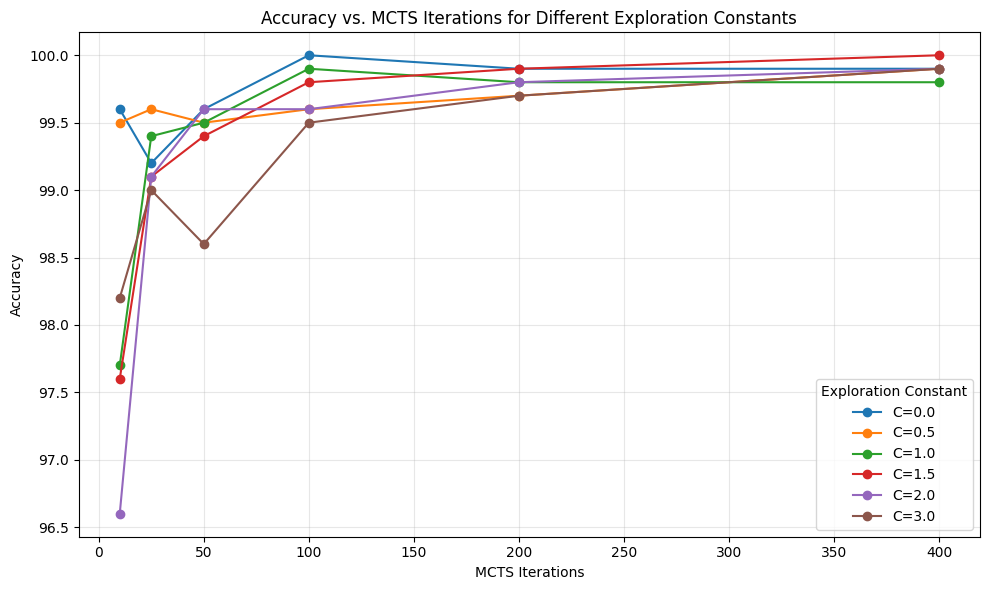

In [6]:
import matplotlib.pyplot as plt

# factors:
# exploration constant: [0, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0]
# number of iterations: [100, 500, 1000, 5000]

file = "data/supervised_mcts_evaluation_100k.csv"
columns = ["exploration_constant", "mcts_iterations", "accuracy"]

data = pd.read_csv(file, usecols=columns)

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot a line for each exploration constant
for constant in data["exploration_constant"].unique():
    df = data[data["exploration_constant"] == constant]
    plt.plot(df["mcts_iterations"], df["accuracy"], marker='o', label=f'C={constant}')

# Add title and labels
plt.title('Accuracy vs. MCTS Iterations for Different Exploration Constants')
plt.xlabel('MCTS Iterations')
plt.ylabel('Accuracy')
# Use linear scale instead of log scale
# Create custom ticks from 0 to 400 in steps of 50
x_ticks = range(0, 401, 50)
plt.xticks(x_ticks, [str(tick) for tick in x_ticks])

plt.grid(True, alpha=0.3)
plt.legend(title='Exploration Constant')

# Improve readability
plt.tight_layout()

# Save or show the plot
# plt.savefig('graphs/all_exploration_constants.png')
plt.show()

In [3]:
'''
ANALYSIS

mcts_iterations - It is interesting that performance seems to get worse when increasing the number of iterations that we run mcts for. This seems couterintuitive as I'd expect that by doing more iterations, we would build a larger tree and so therefore also increase the accuracy of the model.

exploration_constant - This is also interesting, this suggests that using a constant of 0 works the best which would essentially mean we are not exploring at all and pretty much depending on the network entirely to make decisions based on looking at the available moves from the current state. 

I'm excited to look more at this to see if there is a bug or something. It really feels counter intuitive. PUCT may improve performance as well. 

'''

"\nANALYSIS\n\nmcts_iterations - It is interesting that performance seems to get worse when increasing the number of iterations that we run mcts for. This seems couterintuitive as I'd expect that by doing more iterations, we would build a larger tree and so therefore also increase the accuracy of the model.\n\nexploration_constant - This is also interesting, this suggests that using a constant of 0 works the best which would essentially mean we are not exploring at all and pretty much depending on the network entirely to make decisions based on looking at the available moves from the current state. \n\nI'm excited to look more at this to see if there is a bug or something. It really feels counter intuitive. PUCT may improve performance as well. \n\n"